In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN, Dense
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Electric_Production.csv")

In [3]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


 #### The structure of the data, with columns 'Date' and 'Electric_Production',
 #### and some sample values. 

In [4]:
df = pd.read_csv("Electric_Production.csv", index_col="DATE", parse_dates=True)

In [5]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [6]:
df["1985":"1986"]

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


#### DataFrame based on a range of index labels, particularly useful for time series data where 
### the index represents time intervals such as years.

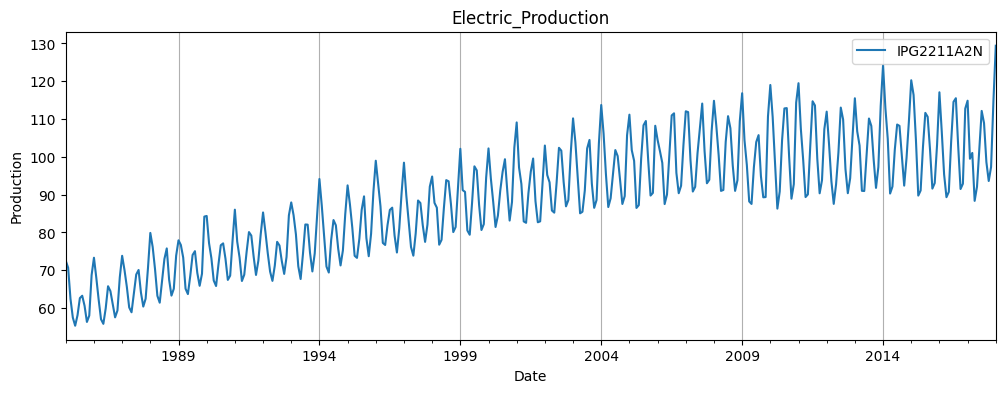

In [7]:
df.plot(figsize=(12,4), xlabel="Date", ylabel="Production", title="Electric_Production")
plt.grid(axis="x")
plt.show()

####  electric production over time, visualizing the data can help
### identify trends, patterns, and anomalies. 

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
result = seasonal_decompose(df)

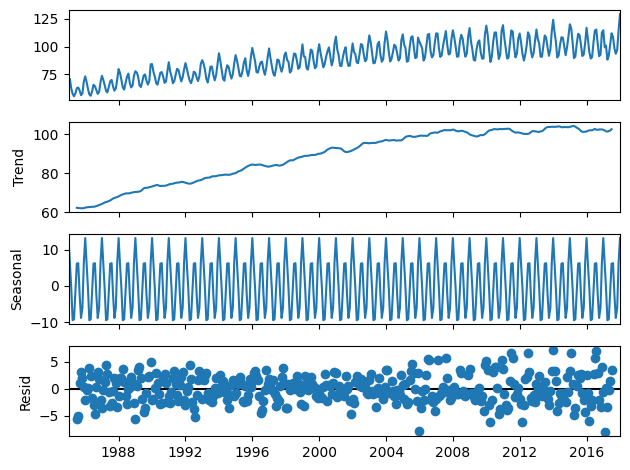

In [10]:
result.plot();

#### The electric production data, decompose the time series into its trend, seasonal,
#### and residual components, and plot these components to help understand 
#### the underlying patterns in the data.

In [11]:
len(df)

397

In [12]:
len(df)/12

33.083333333333336

In [13]:
train = df.iloc[:len(df)-12]
train.shape

(385, 1)

In [14]:
test = df.iloc[len(df)-12:]
test.shape

(12, 1)

In [15]:
train.iloc[0], train.iloc[-1]

(IPG2211A2N    72.5052
 Name: 1985-01-01 00:00:00, dtype: float64,
 IPG2211A2N    114.8505
 Name: 2017-01-01 00:00:00, dtype: float64)

#### train.iloc[0] retrieves and prints the first row of the DataFrame, 
#### while train.iloc[-1] retrieves and prints the last row. 
#### This helps to quickly assess the content and structure of the datase

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
scaled_test[:10]

array([[0.64077645],
       [0.66325258],
       [0.47922825],
       [0.53329717],
       [0.6794058 ],
       [0.82446859],
       [0.77772346],
       [0.62808856],
       [0.55553686],
       [0.60952889]])

In [21]:
scaled_train[146:]

array([[0.40176212],
       [0.30218393],
       [0.26881424],
       [0.35464855],
       [0.48066284],
       [0.47095727],
       [0.38618476],
       [0.32184021],
       [0.38772523],
       [0.53359453],
       [0.57262858],
       [0.47149687],
       [0.45314608],
       [0.31095245],
       [0.32949327],
       [0.45173905],
       [0.55878897],
       [0.55433726],
       [0.46745566],
       [0.35940487],
       [0.37887838],
       [0.52754722],
       [0.6791389 ],
       [0.52027711],
       [0.51382511],
       [0.36557257],
       [0.34919742],
       [0.47183195],
       [0.61176853],
       [0.59618102],
       [0.46286325],
       [0.36736109],
       [0.39001274],
       [0.56855691],
       [0.68052127],
       [0.56547597],
       [0.4754525 ],
       [0.37898862],
       [0.42268907],
       [0.51821299],
       [0.59008874],
       [0.63904015],
       [0.51643173],
       [0.40362316],
       [0.47470257],
       [0.68379514],
       [0.78028947],
       [0.607

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
months = 12

In [24]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=months, batch_size=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 22.4 KB


In [26]:
x, y = generator[0]

In [27]:
x, y

(array([[[0.24934943],
         [0.22275812],
         [0.10349754],
         [0.03127801],
         [0.        ],
         [0.04025686],
         [0.10596346],
         [0.11507721],
         [0.07643625],
         [0.01450976],
         [0.03895283],
         [0.19436378]]]),
 array([[0.26096101]]))

In [28]:
 x2, y2 = generator[2]

In [29]:
x2, y2

(array([[[0.10349754],
         [0.03127801],
         [0.        ],
         [0.04025686],
         [0.10596346],
         [0.11507721],
         [0.07643625],
         [0.01450976],
         [0.03895283],
         [0.19436378],
         [0.26096101],
         [0.18380964]]]),
 array([[0.10018886]]))

In [30]:
generator[0][0].shape

(1, 12, 1)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [32]:
model = Sequential([
    LSTM(1000, activation="relu",input_shape=(12,1)),
    Dense(1)
])

#### his model configuration is used to leverage the strengths of LSTM
#### networks in handling time series data.

In [33]:
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(generator, epochs=40)

Epoch 1/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - loss: 0.0262
Epoch 2/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 35s 93ms/step - loss: 0.0095
Epoch 3/40
373/373 ━━━━━━━━━━━━━━━━━━━━ 35s 94ms/step - loss: 0.0060
Epoch 4/40
 56/373 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - loss: 0.0039

#### the model will see the entire dataset 40 times, with each
#### iteration (epoch) updating its weights tominimize the loss function.

In [ ]:
loss = model.history.history["loss"]

In [ ]:
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Visualization")
plt.show()

#### the training process and understand how the loss (error) of the model changes 
#### over epochs, helping in assessingthe model's performance and convergence.

In [ ]:
test_pred = []

first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, 1))

In [ ]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :],[[current_pred]], axis=1)

#### this code snippet appears to be part of a loop where predictions are made 
#### iteratively for each step in the test dataset, updating the input batch for
#### the next prediction.

In [ ]:
test_pred

In [ ]:
test.head()

In [ ]:
true_pred = scaler.inverse_transform(test_pred)

In [ ]:
true_pred

In [ ]:
test["Prediction"]=true_pred

In [ ]:
test.head()

In [ ]:
test.plot(figsize=(12, 5))
plt.xlabel("Month of Year 2017")
plt.ylabel("IPG2211A2N and Prediction")
plt.title("Comparision of IPG2211A2N vs Prediction")
plt.show

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = np.sqrt(mean_squared_error(test["IPG2211A2N"], test["Prediction"]))

In [ ]:
rmse

In [ ]:
test["IPG2211A2N"].mean()

In [ ]:
test["Prediction"].mean()

In [ ]:
min = 862.66 - rmse
max = 862.66 + rmse

In [ ]:
min, max

#### This approach helps you understand the potential variability in your predictions and provides a more nuanced understanding of your model's performance beyond just looking at the 
### RMSE alone.